

---

**Galapia, Xander Sam E.**

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def buildCityGraph(graphType):
    g = graphType()
    for name in ('Anonas', 'Commonwealth','Marikina' , 'Antipolo', 'Sta lucia', 'San Juan', 'Angono', 'Tanay'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Commonwealth')))
    g.addEdge(Edge(g.getNode('Commonwealth'), g.getNode('Anonas')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Anonas')))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Commonwealth'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Antipolo')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Sta lucia')))
    g.addEdge(Edge(g.getNode('Sta lucia'), g.getNode('San Juan')))
    g.addEdge(Edge(g.getNode('Sta lucia'), g.getNode('Angono')))
    g.addEdge(Edge(g.getNode('Angono'), g.getNode('Tanay')))
    g.addEdge(Edge(g.getNode('San Juan'), g.getNode('Tanay')))

    g.addEdge(Edge(g.getNode('Antipolo'), g.getNode('Tanay')))

    return g

def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

testSP('Anonas', 'Tanay')

Current DFS path: Anonas
Current DFS path: Anonas->Commonwealth
Already visited Anonas
Current DFS path: Anonas->Commonwealth->Marikina
Already visited Anonas
Current DFS path: Anonas->Commonwealth->Marikina->Antipolo
Current DFS path: Anonas->Commonwealth->Marikina->Antipolo->Tanay
Current DFS path: Anonas->Commonwealth->Marikina->Sta lucia
Current DFS path: Anonas->Commonwealth->Marikina->Sta lucia->San Juan
Current DFS path: Anonas->Commonwealth->Marikina->Sta lucia->Angono
Current DFS path: Anonas->Marikina
Already visited Anonas
Current DFS path: Anonas->Marikina->Antipolo
Current DFS path: Anonas->Marikina->Antipolo->Tanay
Current DFS path: Anonas->Marikina->Sta lucia
Current DFS path: Anonas->Marikina->Sta lucia->San Juan
Current DFS path: Anonas->Marikina->Sta lucia->Angono
Shortest path from Anonas to Tanay is Anonas->Marikina->Antipolo->Tanay


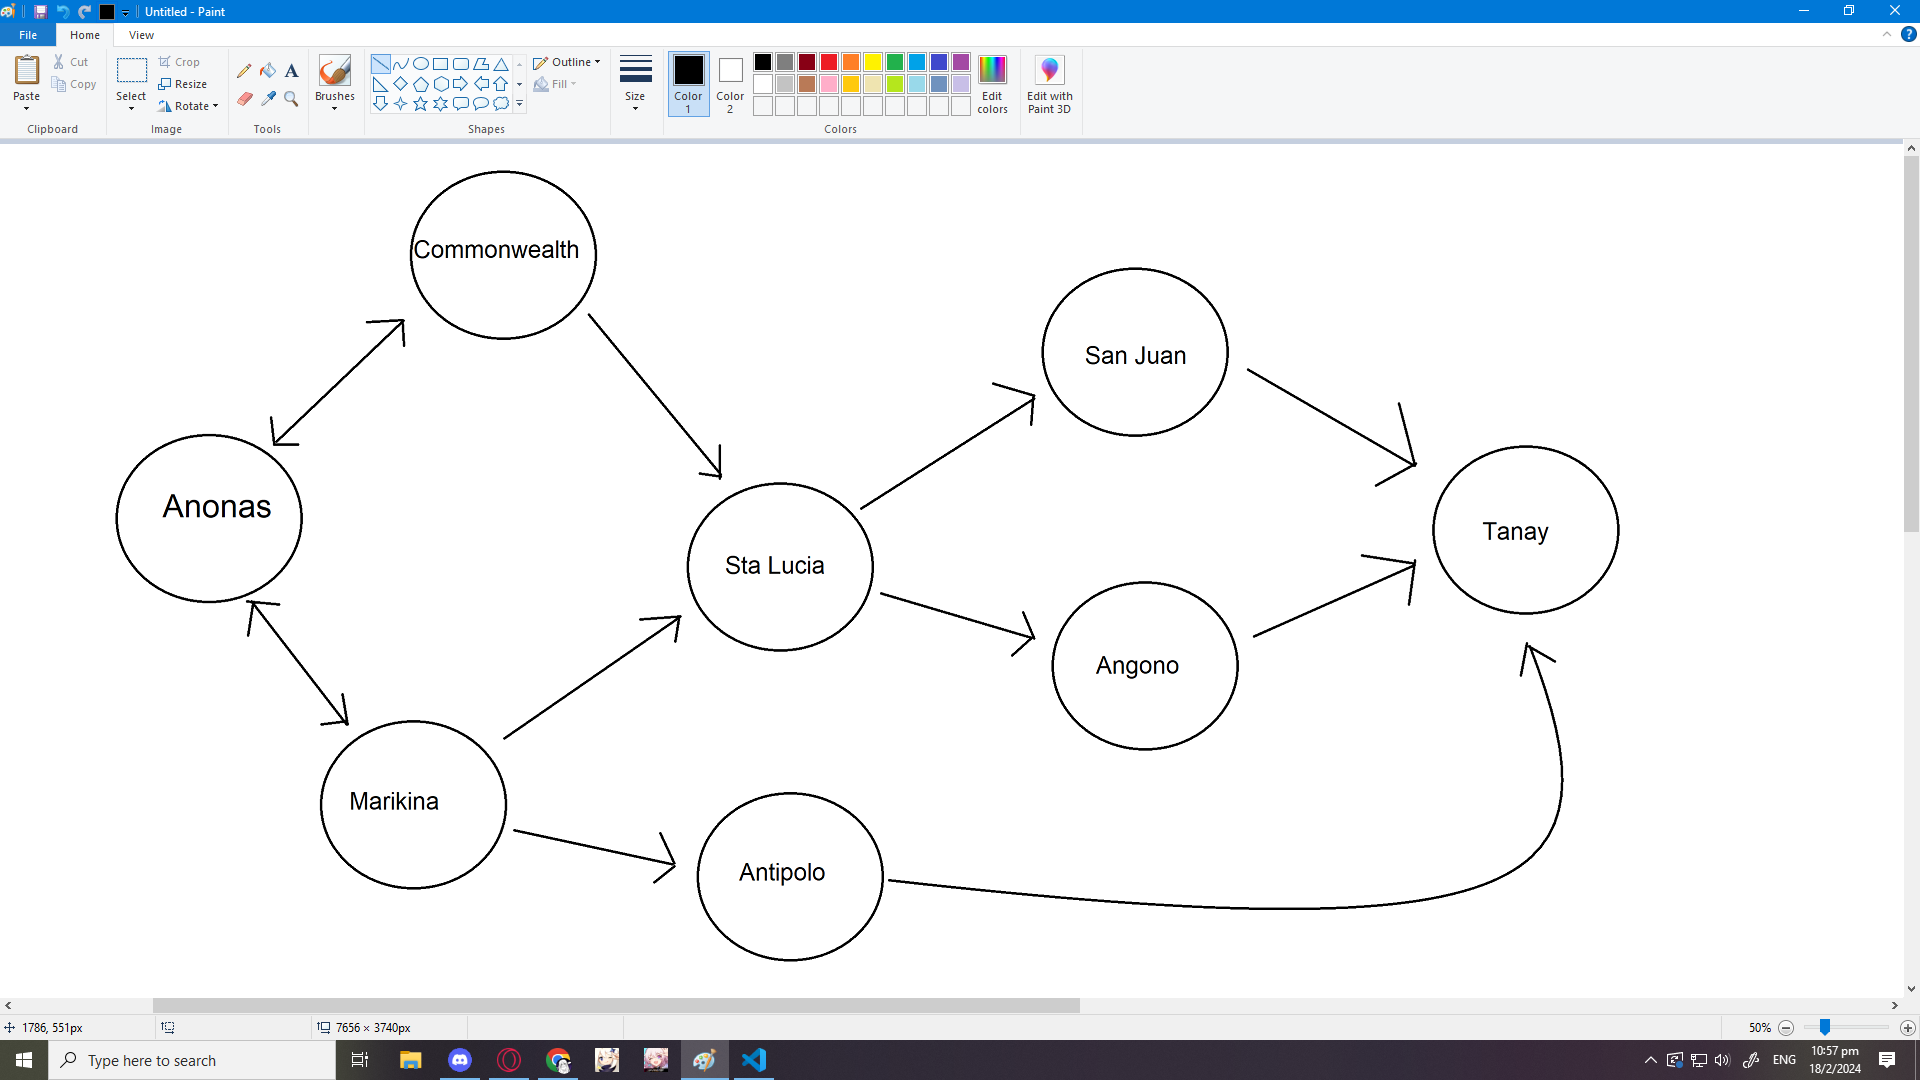

##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

The DFS method in finding the shortest path works by it searches the first destination/node through it's very last node/destination before going to another route/option.
    

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

def buildCityGraph(graphType):
    g = graphType()
    for name in ('Anonas', 'Commonwealth','Marikina' , 'Antipolo', 'Sta lucia', 'San Juan', 'Angono', 'Tanay'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Commonwealth')))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Commonwealth'), g.getNode('Marikina')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Antipolo')))
    g.addEdge(Edge(g.getNode('Marikina'), g.getNode('Sta lucia')))
    g.addEdge(Edge(g.getNode('Sta lucia'), g.getNode('San Juan')))
    g.addEdge(Edge(g.getNode('Sta lucia'), g.getNode('Angono')))
    g.addEdge(Edge(g.getNode('Angono'), g.getNode('Tanay')))
    g.addEdge(Edge(g.getNode('San Juan'), g.getNode('Tanay')))

    g.addEdge(Edge(g.getNode('Antipolo'), g.getNode('Tanay')))

    return g

def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result


def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

testSP('Anonas', 'Tanay')

Current BFS path: Anonas
Current BFS path: Anonas->Commonwealth
Current BFS path: Anonas->Marikina
Current BFS path: Anonas->Commonwealth->Marikina
Current BFS path: Anonas->Marikina->Antipolo
Current BFS path: Anonas->Marikina->Sta lucia
Current BFS path: Anonas->Commonwealth->Marikina->Antipolo
Current BFS path: Anonas->Commonwealth->Marikina->Sta lucia
Current BFS path: Anonas->Marikina->Antipolo->Tanay
Shortest path from Anonas to Tanay is Anonas->Marikina->Antipolo->Tanay


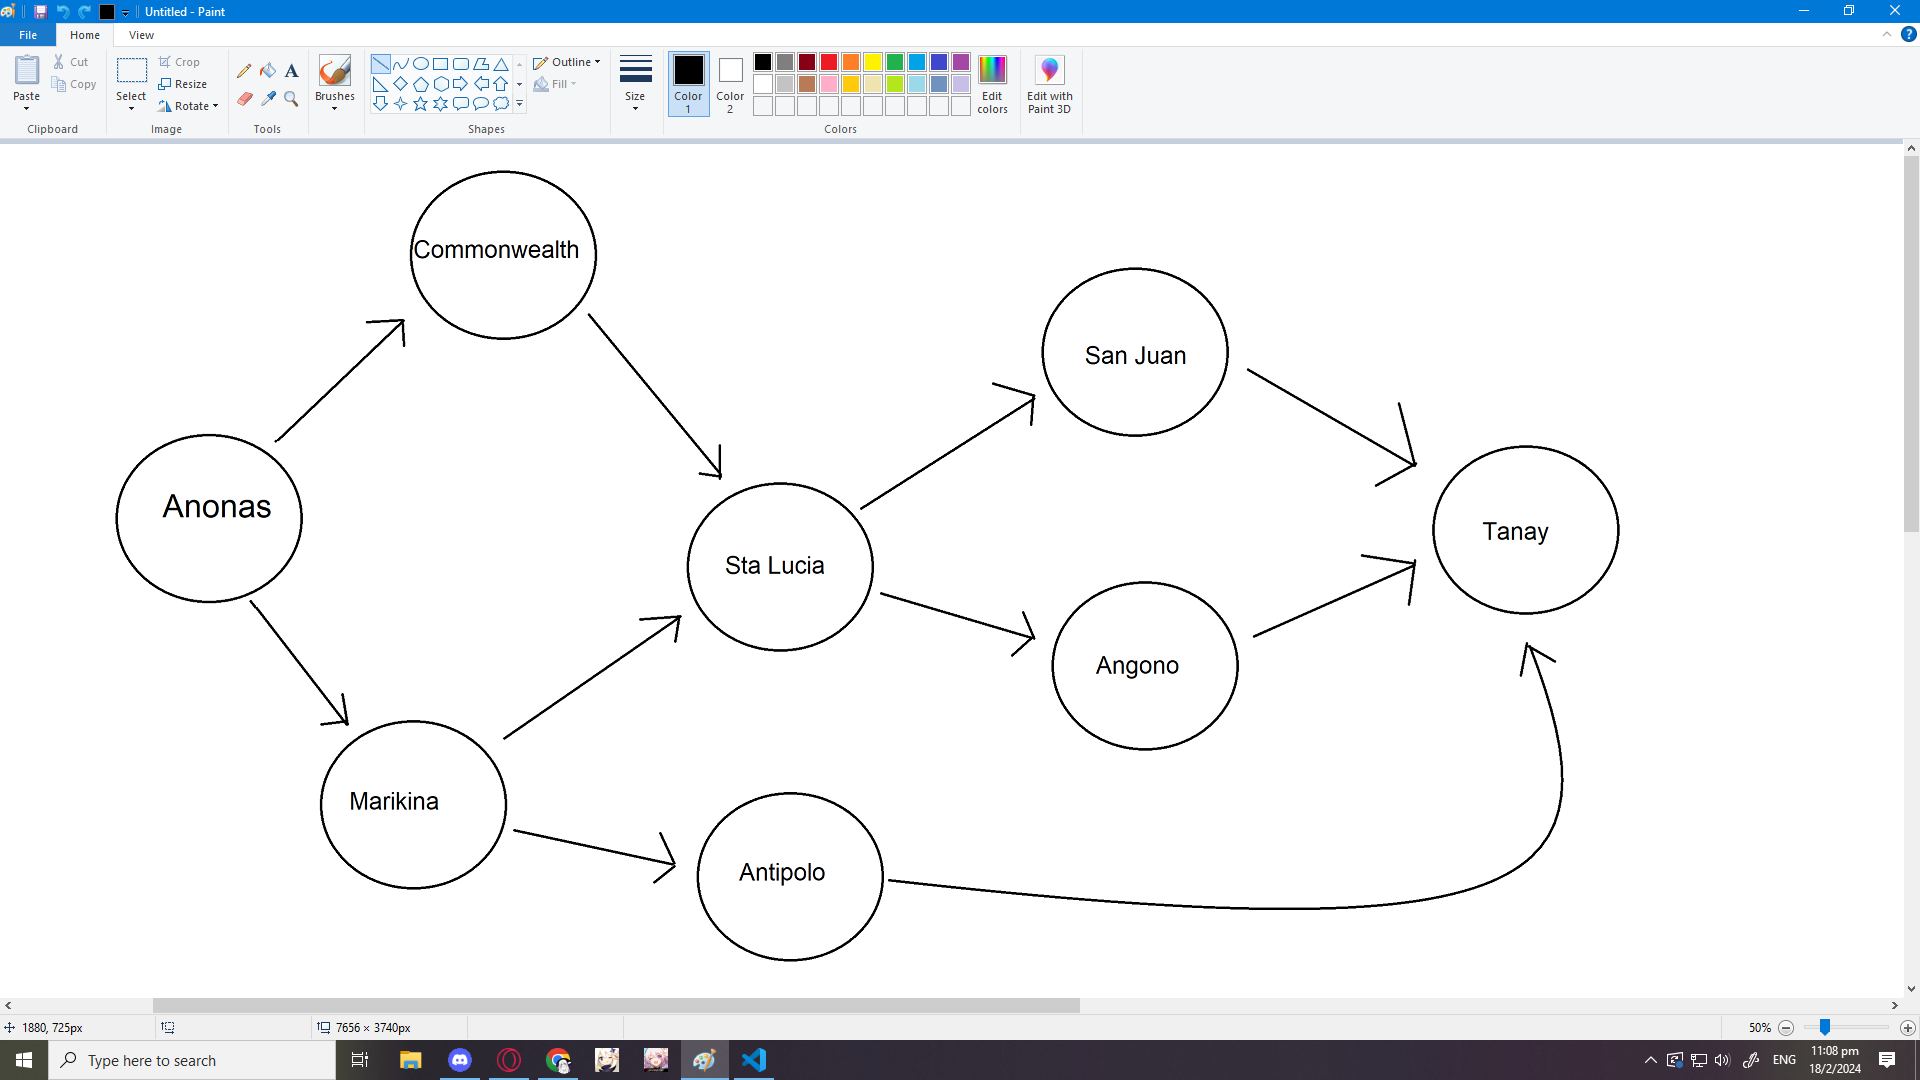

#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:

Although the BFS approach is quicker than the DFS method, it only offers a temporary solution rather than the optimal one since it returns the data to its destination right away.

##CONCLUSION

The difference between the BFS Method and the DFS Method in finding the shortest route is that the DFS Method of finding the shortest route needs more time than the BFS Method as it goes through all the possible route while for the BFS route is faster as it search through the first path then after checking it will go through another path again